<a href="https://colab.research.google.com/github/rishrk007/Data-Sprint-24-Tinder-Millennial-Match/blob/main/Data_Sprint_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier, Huber
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , ExtraTreesClassifier , AdaBoostClassifier
from sklearn.model_selection import KFold ,StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

In [152]:
train = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/train_set_label.csv")
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/test_set_label.csv')

In [153]:
print(train.shape)

(1896, 7)


In [154]:
train = train.drop_duplicates()
train.reset_index(drop=True,inplace=True)

In [155]:
train.head()

ID Segment type  ... Percentage It became a relationship
0  292890.8970          web  ...   0.000000                        0
1  292887.9870          web  ...   0.000000                        0
2  292894.0656       gender  ...   0.225255                        0
3  292887.1180          web  ...   0.000000                        0
4  292893.6561       gender  ...   0.211360                        0

[5 rows x 7 columns]

In [156]:
train["It became a relationship"].value_counts()

0    1229
1     665
Name: It became a relationship, dtype: int64

In [157]:
train['ID1'] = 0.0
train['ID2'] = 0.0

j = 0
for i in train['ID']:
  train['ID1'][j],train['ID2'][j] = math.modf(i)
  j = j+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
def segement_desc(x):
  if (str(x).find('Meridian, Idaho') > -1):
    return 1
  else:
    return 0

In [159]:
train['Segment Description'] = train['Segment Description'].apply(lambda x: segement_desc(x))

In [160]:
train = pd.get_dummies(train, columns = ['Segment type','Answer'])

In [161]:
train.head()

ID  Segment Description  ...  Answer_No  Answer_Yes
0  292890.8970                    1  ...          1           0
1  292887.9870                    1  ...          1           0
2  292894.0656                    1  ...          1           0
3  292887.1180                    1  ...          1           0
4  292893.6561                    1  ...          1           0

[5 rows x 14 columns]

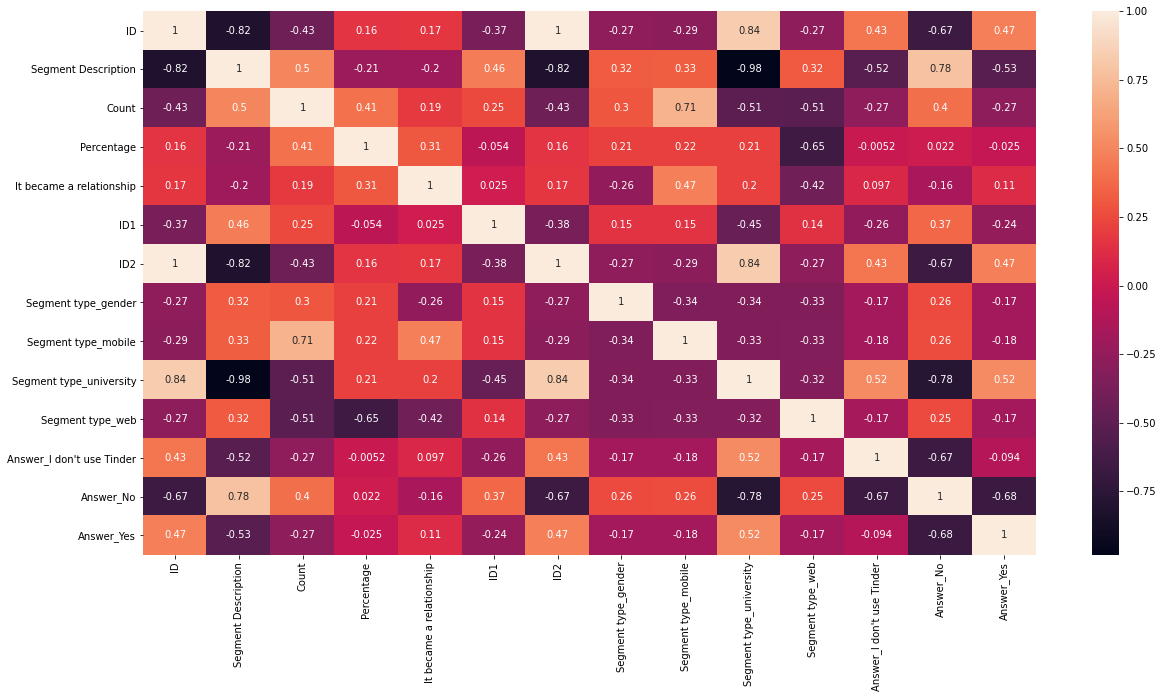

In [162]:
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(train.corr(),annot=True)

In [163]:
train.columns

Index(['ID', 'Segment Description', 'Count', 'Percentage',
       'It became a relationship', 'ID1', 'ID2', 'Segment type_gender',
       'Segment type_mobile', 'Segment type_university', 'Segment type_web',
       'Answer_I don't use Tinder', 'Answer_No', 'Answer_Yes'],
      dtype='object')

In [164]:
# Drop ID , Segment type_university

col = ['Segment Description', 'Count', 'Percentage', 'ID1', 'ID2', 'Segment type_gender',
       'Segment type_mobile', 'Segment type_web',
       'Answer_I don\'t use Tinder', 'Answer_No', 'Answer_Yes']

x = train[col]
y = train['It became a relationship']


In [165]:
x.head()

Segment Description       Count  ...  Answer_No  Answer_Yes
0                    1    0.000000  ...          1           0
1                    1    0.000000  ...          1           0
2                    1  499.173606  ...          1           0
3                    1    0.000000  ...          1           0
4                    1  455.925963  ...          1           0

[5 rows x 11 columns]

In [166]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=0)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1325, 11)
y_train dataset:  (1325,)
X_test dataset:  (569, 11)
y_test dataset:  (569,)


In [167]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)

X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Xgb Classifier**

In [168]:
xgb = XGBClassifier()
xgb.fit(X_train_res,y_train_res)

pred1 = xgb.predict(X_test)
print(accuracy_score(pred1,y_test))

0.9525483304042179


In [169]:
print(confusion_matrix(y_test,pred1))

[[380   8]
 [ 19 162]]


**Random Forest**

In [170]:
rfc = RandomForestClassifier()
rfc.fit(X_train_res,y_train_res)

pred2 = rfc.predict(X_test)
print(accuracy_score(pred2,y_test))

0.9420035149384886


In [171]:
print(confusion_matrix(y_test,pred2))

[[375  13]
 [ 20 161]]


**LightGBM Classifier**

In [172]:
lgb = LGBMClassifier()
lgb.fit(X_train_res,y_train_res)

pred3 = lgb.predict(X_test)
print(accuracy_score(pred3,y_test))

0.9402460456942003


In [173]:
print(confusion_matrix(y_test,pred3))

[[372  16]
 [ 18 163]]


**Catboost Classifier**

In [ ]:
!pip install catboost

In [174]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(
    n_estimators=5000,
    random_state=1994,
    eval_metric='Accuracy',
    learning_rate=0.03,
    max_depth=5 )

cbc.fit( X_train_res, y_train_res, eval_set=[(X_train_res,y_train_res),(X_test, y_test)],
    early_stopping_rounds=200,
    verbose=200)

#cbc.fit(X_train_res,y_train_res)

pred4 = cbc.predict(X_test)
print(accuracy_score(pred4,y_test))

0:	learn: 0.8876338	test: 0.8876338	test1: 0.9156415	best: 0.9156415 (0)	total: 2.46ms	remaining: 12.3s
200:	learn: 0.9619501	test: 0.9619501	test1: 0.9490334	best: 0.9490334 (16)	total: 478ms	remaining: 11.4s
400:	learn: 0.9756243	test: 0.9756243	test1: 0.9437610	best: 0.9507909 (201)	total: 934ms	remaining: 10.7s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9507908612
bestIteration = 201

Shrink model to first 202 iterations.
0.9507908611599297


In [175]:
print(confusion_matrix(y_test,pred4))

[[381   7]
 [ 21 160]]


**Testing**

In [176]:
test.head()

ID Segment type  ...        Count Percentage
0  292974.2311   university  ...     0.230742   0.115371
1  292889.7996          web  ...     0.000000   0.000000
2  293724.0350   university  ...     0.000000   0.000000
3  292884.0724       mobile  ...  1497.699982   0.388752
4  292882.0964       mobile  ...  1439.464988   0.373646

[5 rows x 6 columns]

In [177]:
test['ID1'] = 0.0
test['ID2'] = 0.0

j = 0
for i in test['ID']:
  test['ID1'][j],test['ID2'][j] = math.modf(i)
  j = j+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [178]:
test = pd.get_dummies(test, columns = ['Segment type','Answer'])

In [179]:
del test['ID']

In [180]:
del test['Segment type_university']

In [181]:
test['Segment Description'] = test['Segment Description'].apply(lambda x: segement_desc(x))

In [182]:
pred = xgb.predict(test.values)
target = pd.DataFrame()
target['prediction'] = pred
target.to_csv("xgb.csv", index=False)

**Stacking Classifier**

In [ ]:
from sklearn.ensemble import StackingClassifier
estimator=[("rfc",rfc),("xgb",xgb), ("cbc",cbc)]
clf = StackingClassifier(estimators=estimator)

clf.fit(X_train_res,y_train_res)

In [184]:
predf = clf.predict(X_test)
print(accuracy_score(predf,y_test))

0.9402460456942003


In [185]:
predf = clf.predict(test.values)

In [186]:
target = pd.DataFrame()
target['prediction'] = predf
target.to_csv("stack1.csv", index=False)

**Extra things**

In [187]:
train1 = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/train_set_label.csv")
test1 = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Tinder_Millennial_Match/test_set_label.csv')

In [189]:
train1 = train1.drop_duplicates()
train1.reset_index(drop=True,inplace=True)

In [191]:
train1['ID1'] = 0.0
train1['ID2'] = 0.0

j = 0
for i in train1['ID']:
  train1['ID1'][j],train1['ID2'][j] = math.modf(i)
  j = j+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [201]:
test1['ID1'] = 0.0
test1['ID2'] = 0.0

j = 0
for i in test1['ID']:
  test1['ID1'][j],test1['ID2'][j] = math.modf(i)
  j = j+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [210]:
train1.head()

ID Segment type  ...     ID1       ID2
0  292890.8970          web  ...  0.8970  292890.0
1  292887.9870          web  ...  0.9870  292887.0
2  292894.0656       gender  ...  0.0656  292894.0
3  292887.1180          web  ...  0.1180  292887.0
4  292893.6561       gender  ...  0.6561  292893.0

[5 rows x 9 columns]

In [193]:
train1.columns

Index(['ID', 'Segment type', 'Segment Description', 'Answer', 'Count',
       'Percentage', 'It became a relationship', 'ID1', 'ID2'],
      dtype='object')

In [195]:
col = ['Segment type', 'Segment Description', 'Answer', 'Count',
       'Percentage', 'ID1', 'ID2']

x1 = train1[col]
y1 = train1['It became a relationship']

In [202]:
del test1['ID']

In [206]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [197]:
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

m = CatBoostClassifier(n_estimators=5000,random_state=1994,eval_metric='Accuracy',learning_rate=0.03,max_depth=5,cat_features=[0,1,2])
m.fit(X_train1, y_train1,eval_set=[(X_train1,y_train1),(X_test1, y_test1)],early_stopping_rounds=200,verbose=200)

print(accuracy_score(m.predict(X_test1),y_test1))

0:	learn: 0.8990099	test: 0.8983498	test1: 0.9129288	best: 0.9129288 (0)	total: 8.26ms	remaining: 41.3s
200:	learn: 0.9663366	test: 0.9768977	test1: 0.9472296	best: 0.9630607 (94)	total: 812ms	remaining: 19.4s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.963060686
bestIteration = 94

Shrink model to first 95 iterations.
0.9630606860158312


In [203]:
errCB = []
y_pred_tot_cb = []
from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=5)
i = 1

for train_index, test_index in fold.split(x1,y1):
  x_train, x_val = x1.iloc[train_index], x1.iloc[test_index]
  y_train, y_val = y1[train_index], y1[test_index]
  m = CatBoostClassifier(n_estimators=5000,random_state=1994,eval_metric='Accuracy',learning_rate=0.03,max_depth=5,cat_features=[0,1,2])
  m.fit(x_train, y_train,eval_set=[(x_train,y_train),(x_val, y_val)],early_stopping_rounds=200,verbose=200)
  pred_y = m.predict(x_val)
  print("err_cb: ",accuracy_score(pred_y,y_val))
  errCB.append(accuracy_score(pred_y,y_val))
  pred_test = m.predict(test1)
  i = i + 1
  y_pred_tot_cb.append(pred_test)

0:	learn: 0.8904290	test: 0.8970297	test1: 0.8839050	best: 0.8839050 (0)	total: 6.09ms	remaining: 30.4s
200:	learn: 0.9636964	test: 0.9947195	test1: 0.9525066	best: 0.9525066 (140)	total: 906ms	remaining: 21.6s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9525065963
bestIteration = 140

Shrink model to first 141 iterations.
err_cb:  0.9525065963060686
0:	learn: 0.8924092	test: 0.8983498	test1: 0.8891821	best: 0.8891821 (0)	total: 5ms	remaining: 25s
200:	learn: 0.9590759	test: 0.9966997	test1: 0.9525066	best: 0.9525066 (139)	total: 857ms	remaining: 20.5s
400:	learn: 0.9669967	test: 0.9960396	test1: 0.9630607	best: 0.9630607 (277)	total: 1.7s	remaining: 19.5s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.963060686
bestIteration = 277

Shrink model to first 278 iterations.
err_cb:  0.9630606860158312
0:	learn: 0.8930693	test: 0.8996700	test1: 0.8891821	best: 0.8891821 (0)	total: 4.79ms	remaining: 23.9s
200:	learn: 0.9603960	test: 0.9927393	te

In [204]:
np.mean(errCB,0)

0.9625148329633818

In [205]:
submission=pd.DataFrame()
submission['prediction']=np.where(np.mean(y_pred_tot_cb,0)>0.5,1,0)
submission.to_csv('final.csv',index=False)